### 6. Trajektorie liczby wygranych
Proszę dla obydwu graczy narysować trajektorie liczby wygranych (całych rozgrywek!) w funkcji liczby gier dla kilku wybranych parametrów a, b, p (przy a+b=100).

(To tzw. proces liczący - https://pl.wikipedia.org/wiki/Proces_licz%C4%85cy. Trajektorie będą krzywymi niemalejącymi.)

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

In [77]:
def simulate_ruin(capital_a: int, capital_b: int, p: float) -> tuple[int, int]:
    """
    p - probability of player A taking 1$ from player B
    """
    while capital_a != 0 and capital_b != 0:
        if np.random.rand() < p:
            capital_a += 1
            capital_b -= 1
        else:
            capital_a -= 1
            capital_b += 1

    return capital_a, capital_b

In [84]:
total_capital = 100
a_capitals = [10, 25, 50]
ps = [0.48, 0.49, 0.5]


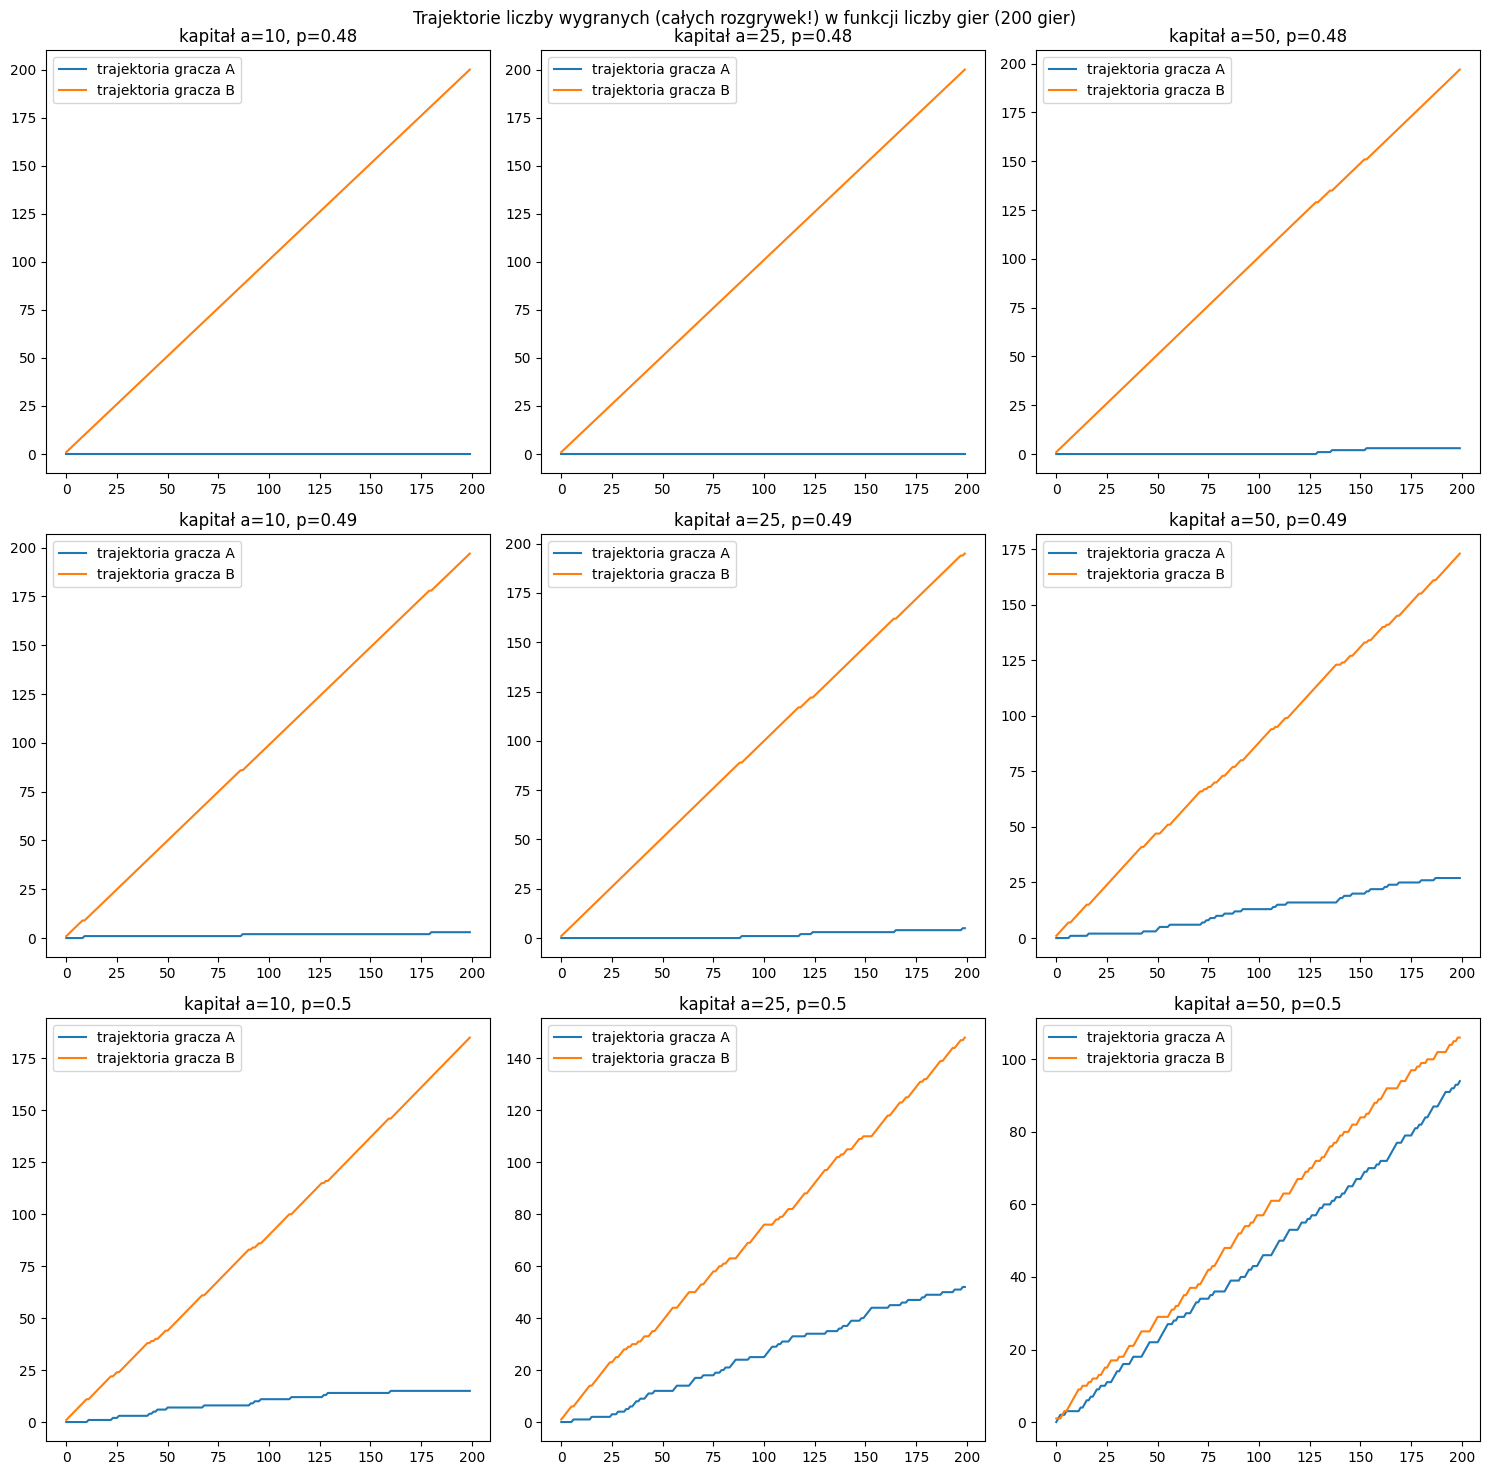

In [87]:
n_games = 200
a_trajectories = defaultdict(lambda: defaultdict(list)) # quite cool!
b_trajectories = defaultdict(lambda: defaultdict(list)) # and convenient

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle("Trajektorie liczby wygranych (całych rozgrywek!) w funkcji liczby gier (200 gier)")

for i, p in enumerate(ps):
    for j, c in enumerate(a_capitals):
        total_wins_a = total_wins_b = 0
        for _ in range(n_games):
            capital_a = c
            result_a, result_b = simulate_ruin(capital_a, total_capital - capital_a, p)
            if result_a > result_b:
                total_wins_a += 1
            else:
                total_wins_b += 1
            a_trajectories[p][c].append(total_wins_a)
            b_trajectories[p][c].append(total_wins_b)
        axes[i][j].plot(range(n_games), a_trajectories[p][c], label="trajektoria gracza A")
        axes[i][j].plot(range(n_games), b_trajectories[p][c], label="trajektoria gracza B")
        axes[i][j].set_title(f"kapitał a={capital_a}, p={p}")
        axes[i][j].legend()

plt.tight_layout()